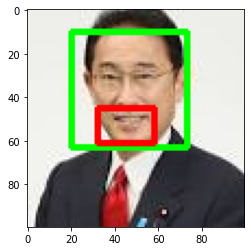

<Figure size 432x288 with 0 Axes>

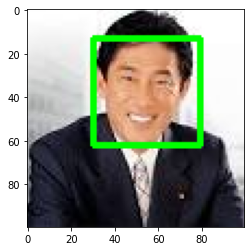

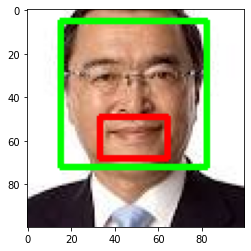

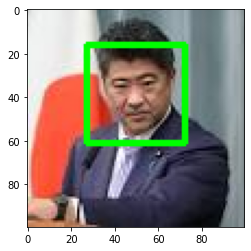

<Figure size 432x288 with 0 Axes>

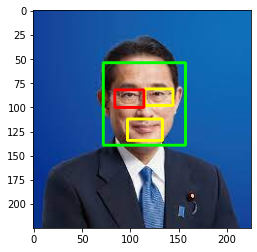

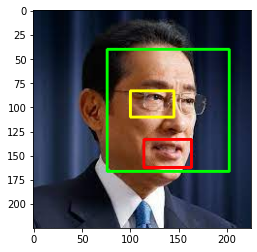

In [17]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

import glob

face_cascade = cv2.CascadeClassifier('../haarcascade_frontalface_default.xml')
mouth_cascade = cv2.CascadeClassifier('../haarcascade_mcs_mouth.xml')

img_path_list = glob.glob('*.jpeg')

for img_path in img_path_list:
    plt.figure()
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    mask_flag = True
    if len(faces) > 0:
        (x,y,w,h) = faces[0]

        roi_gray = gray[y:y+h, x:x+w]

        roi_color = img[y:y+h, x:x+w]

        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

        tmp_mouth = mouth_cascade.detectMultiScale(roi_gray)
        
        if len(tmp_mouth) > 0:
            for  (mx,my,mw,mh) in tmp_mouth[:-1]:

                #tmp_mouth_len = len(tmp_mouth)
                #(mx,my,mw,mh) =  tmp_mouth[-1]

                cv2.rectangle(roi_color,(mx,my),(mx+mw,my+mh),(0,255,255),2)
            (mx,my,mw,mh) =  tmp_mouth[-1]
            cv2.rectangle(roi_color,(mx,my),(mx+mw,my+mh),(0,0,255),2)

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        plt.imshow(img)

# 結論
必ずしも最後の要素が口ではない

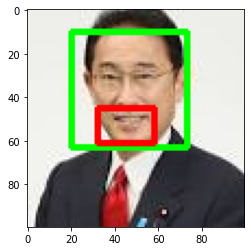

<Figure size 432x288 with 0 Axes>

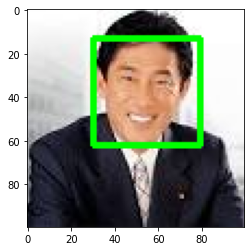

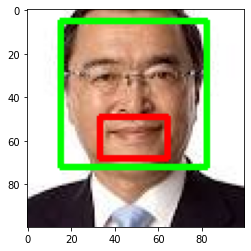

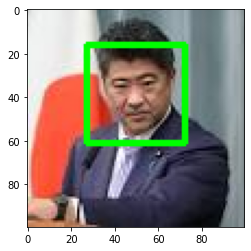

<Figure size 432x288 with 0 Axes>

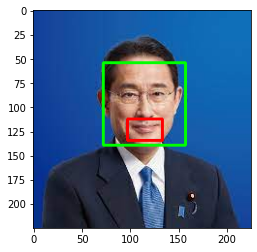

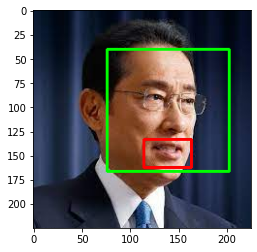

In [26]:
import numpy as np
for img_path in img_path_list:
    plt.figure()
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    mask_flag = True
    if len(faces) > 0:
        (x,y,w,h) = faces[0]

        roi_gray = gray[y:y+h, x:x+w]

        roi_color = img[y:y+h, x:x+w]

        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

        tmp_mouth = mouth_cascade.detectMultiScale(roi_gray)
        
        
        if len(tmp_mouth) > 0:
            tmp_mouth = tmp_mouth[np.argsort(tmp_mouth[:, 1])]
            (mx,my,mw,mh) =  tmp_mouth[-1]


            cv2.rectangle(roi_color,(mx,my),(mx+mw,my+mh),(0,0,255),2)

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        plt.imshow(img)